Filename: /home/adyachenko/MSX Images/V921 Sco/msxmapA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (1199, 1199)   float64   
Scale = 6.0000001452000005  arcsec/pix
FOV= 1.9983333816930002 deg
Image data shape: (1199, 1199)
MAX RADIUS = 50.5050492828283 pix
Min: 7.058392839098815e-07
Max: 0.001060228212736547
Mean: 3.6938638370983807e-06
Stdev: 5.0292328959608205e-06
Backgorud outer radius = 62.301622073563976 pixels
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   599.5   599.5  0.025637143
 id xcenter ycenter ... aperture_sum_17 aperture_sum_18 aperture_sum_19
      pix     pix   ...                                                
--- ------- ------- ... --------------- --------------- ---------------
  1   599.5   599.5 ...     0.025551796        0.036376     0.061612044
User waveleng = 8.280000000000001 um
Models waveleng = 8.331479235203147 um /index = 97


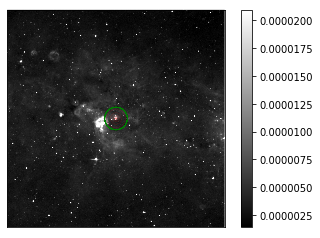

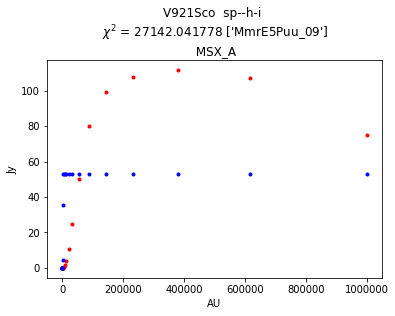

Filename: /home/adyachenko/MSX Images/V921 Sco/msxmapC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (1199, 1199)   float64   
Scale = 6.0000001452000005  arcsec/pix
FOV= 1.9983333816930002 deg
Image data shape: (1199, 1199)
MAX RADIUS = 50.5050492828283 pix
Min: -1.8187880641562515e-06
Max: 0.0006397768156602979
Mean: 1.7648717084020398e-06
Stdev: 1.9544918514870303e-06
Backgorud outer radius = 62.301622073563976 pixels
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   599.5   599.5  0.011951156
 id xcenter ycenter ... aperture_sum_17 aperture_sum_18 aperture_sum_19
      pix     pix   ...                                                
--- ------- ------- ... --------------- --------------- ---------------
  1   599.5   599.5 ...     0.008643426     0.013529819     0.025670226
User waveleng = 12.13 um
Models waveleng = 12.35068986454994 um /index = 91


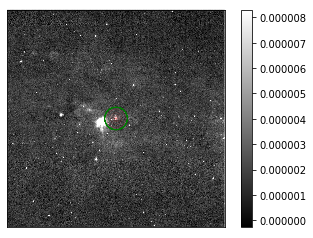

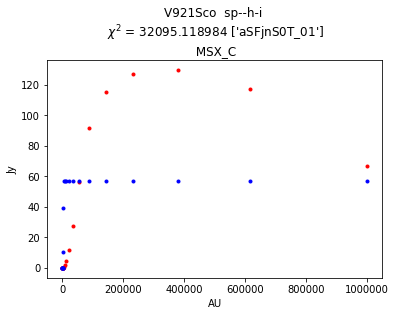

Filename: /home/adyachenko/MSX Images/V921 Sco/msxmapD.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (1199, 1199)   float64   
Scale = 6.0000001452000005  arcsec/pix
FOV= 1.9983333816930002 deg
Image data shape: (1199, 1199)
MAX RADIUS = 50.5050492828283 pix
Min: -1.8903859881902463e-06
Max: 0.00038401084020733833
Mean: 8.321266475464649e-07
Stdev: 1.2872792078277212e-06
Backgorud outer radius = 62.301622073563976 pixels
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   599.5   599.5 0.0063328018
 id xcenter ycenter ... aperture_sum_17 aperture_sum_18 aperture_sum_19
      pix     pix   ...                                                
--- ------- ------- ... --------------- --------------- ---------------
  1   599.5   599.5 ...    0.0043353367    0.0067701184     0.012748095
User waveleng = 14.65 um
Models waveleng = 15.037504366167322 um /index = 88


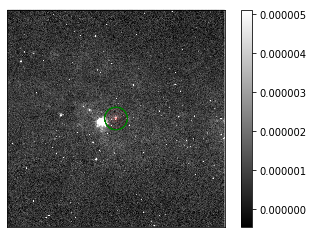

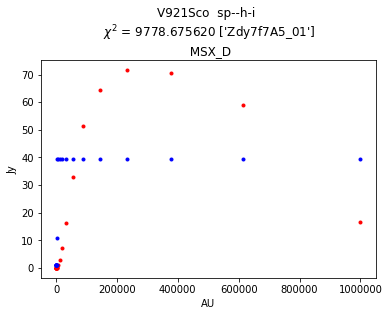

Filename: /home/adyachenko/MSX Images/V921 Sco/msxmapE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (1199, 1199)   float64   
Scale = 6.0000001452000005  arcsec/pix
FOV= 1.9983333816930002 deg
Image data shape: (1199, 1199)
MAX RADIUS = 50.5050492828283 pix
Min: -5.461183718580287e-06
Max: 0.0003498074656818062
Mean: 1.653462675485697e-06
Stdev: 2.931554936960951e-06
Backgorud outer radius = 62.301622073563976 pixels
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   599.5   599.5  0.017054361
 id xcenter ycenter ... aperture_sum_17 aperture_sum_18 aperture_sum_19
      pix     pix   ...                                                
--- ------- ------- ... --------------- --------------- ---------------
  1   599.5   599.5 ...     0.013676304     0.019432133     0.034035204
User waveleng = 21.34 um
Models waveleng = 20.876131149845325 um /index = 83


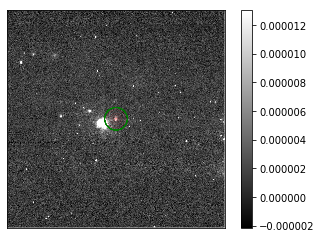

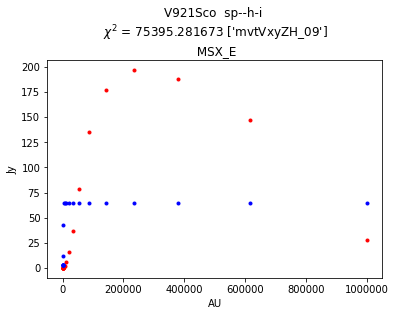

final_chi2 min = 153823.32651070686
[16551]


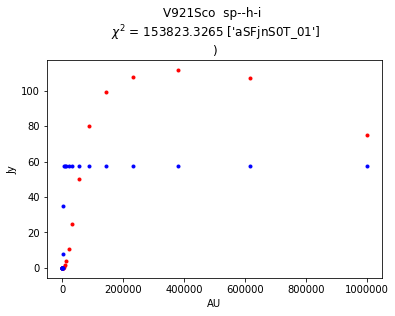

In [1]:
def photometry_MSX_A(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    bkg_table = aperture_photometry(image_data, annulus_aperture, wcs=wcs)   
    bkg_mean = bkg_table['aperture_sum'] / annulus_aperture.area()
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area()
        phot_table['aperture_sum_' + str(i)].info.format = '%.8g'  # for consistent table output
    
    final_sum =  phot_array - bkg_sum_array   
    
    phot_Jy_MSX_A = final_sum* 7.133e12 *scale**2/((180/np.pi)**2*3600**2) # MSX_A W/m^2-sr to Jy *7.133e12*scale**2/((180/np.pi)**2*3600**2)
    
    
    bkg_table ['aperture_sum'].info.format = '%.8g'  # for consistent table output
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(bkg_table)
    print(phot_table)
    return(phot_Jy_MSX_A)

def photometry_MSX_C(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    bkg_table = aperture_photometry(image_data, annulus_aperture, wcs=wcs)   
    bkg_mean = bkg_table['aperture_sum'] / annulus_aperture.area()
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area()
        phot_table['aperture_sum_' + str(i)].info.format = '%.8g'  # for consistent table output
    
    final_sum =  phot_array - bkg_sum_array   
    

    phot_Jy_MSX_C = final_sum* 2.863e13 *scale**2/((180/np.pi)**2*3600**2) # MSX_C W/m^2-sr to Jy *2.863e13*scale**2/((180/np.pi)**2*3600**2)

    
    bkg_table ['aperture_sum'].info.format = '%.8g'  # for consistent table output
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(bkg_table)
    print(phot_table)
    return(phot_Jy_MSX_C)

def photometry_MSX_D(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    bkg_table = aperture_photometry(image_data, annulus_aperture, wcs=wcs)   
    bkg_mean = bkg_table['aperture_sum'] / annulus_aperture.area()
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area()
        phot_table['aperture_sum_' + str(i)].info.format = '%.8g'  # for consistent table output
    
    final_sum =  phot_array - bkg_sum_array   
    

    phot_Jy_MSX_D = final_sum* 3.216e13 *scale**2/((180/np.pi)**2*3600**2) # MSX_D W/m^2-sr to Jy *3.216e13*scale**2/((180/np.pi)**2*3600**2)
    
    bkg_table ['aperture_sum'].info.format = '%.8g'  # for consistent table output
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(bkg_table)
    print(phot_table)
    return(phot_Jy_MSX_D)


def photometry_MSX_E(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    bkg_table = aperture_photometry(image_data, annulus_aperture, wcs=wcs)   
    bkg_mean = bkg_table['aperture_sum'] / annulus_aperture.area()
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area()
        phot_table['aperture_sum_' + str(i)].info.format = '%.8g'  # for consistent table output
    
    final_sum =  phot_array - bkg_sum_array   
    

    phot_Jy_MSX_E = final_sum* 2.476e13 *scale**2/((180/np.pi)**2*3600**2) # MSX_E W/m^2-sr to Jy *2.476e13*scale**2/((180/np.pi)**2*3600**2)
    
    bkg_table ['aperture_sum'].info.format = '%.8g'  # for consistent table output
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(bkg_table)
    print(phot_table)
    return(phot_Jy_MSX_E)



import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.visualization import ImageNormalize, ZScaleInterval, PercentileInterval
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy import units as u
from astropy.coordinates import SkyCoord

from photutils import SkyCircularAperture
from photutils import CircularAperture
from photutils import CircularAnnulus
from photutils import aperture_photometry

import MSX_photometry

#distance_range=[1.40745, 1.74476] * u.kpc             # HIP 90617
#arr=['s-pbhmi','s-pbsmi','sp--h-i','s-p-hmi','sp--hmi','sp--s-i','s-p-smi','sp--smi',
    # 'spu-hmi','spu-smi','s---s-i','s---smi','s-ubhmi','s-ubsmi','s-u-hmi','s-u-smi','spubsmi','spubhmi']
arr= ['sp--h-i']
obj_name = 'V921Sco'
dist = 1650 #pc
#user_fitsfile = '/home/adyachenko/MSX Images/V921 Sco/msxmapC.fits'
arr_userfile=['/home/adyachenko/MSX Images/V921 Sco/msxmapA.fits', '/home/adyachenko/MSX Images/V921 Sco/msxmapC.fits',
              '/home/adyachenko/MSX Images/V921 Sco/msxmapD.fits', '/home/adyachenko/MSX Images/V921 Sco/msxmapE.fits']
#models= 'spubsmi'


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

def rob_fits(user_fitsfile):
    hdul = fits.open(user_fitsfile)
    wavelength = hdul['SPECTRAL_INFO'].data
    wave = wavelength['WAVELENGTH']
    aperture = hdul['APERTURES'].data
    ap = aperture['APERTURE']  
    fnu = hdul['VALUES'].data
    mod_names = hdul['MODEL_NAMES'].data
    names = np.array(mod_names.astype('<U11'))
    return(ap, wave, fnu*(1000/dist)**2/1000, names)

def user_fits(rob_fitsfile,ap,flag):
    hdul = fits.open(rob_fitsfile)
    hdul.info()
    image_data = hdul[0].data[::-1,: ] #инвертирует ось y
    wcs = WCS(hdul[0].header)
    waveleng = hdul[0].header['WAVELENG']
    scale = np.mean(proj_plane_pixel_scales(wcs))*3600
    #scale = np.abs(CDELT1)*3600  #arcsec/pix
    FOV = image_data.shape[0]*scale
    hdul.close()
    print("Scale =",scale, " arcsec/pix")
    print("FOV=", FOV/60/60, "deg")
    print('Image data shape:', image_data.shape)
    # AU           | 1.49598e+11 m 
    # pc           | 3.08568e+16 m  
    L = dist * FOV    #мой способ!!
    aupixel = L/image_data.shape[0]   # AU in pixel
    radius = ap/aupixel/2

    radpix = ap/2/dist/scale
    print('MAX RADIUS =', radpix[19], 'pix')
    
    #norm = ImageNormalize(image_data, interval=ZScaleInterval())         # Scale = ZScale
    norm = ImageNormalize(image_data, interval=PercentileInterval(99.5))  # Scale = 99.5%

    ax = plt.subplot(projection=wcs)
    for i in range(0,len(radpix)):
        ax.add_patch(plt.Circle((image_data.shape[0]/2,image_data.shape[0]/2), radpix[i] ,lw = 0.1, color='r', fill=False))
        ax.add_patch(plt.Circle((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19]+ radpix[16] ,lw = 0.5, color='green', fill=False))
    plt.imshow(image_data, cmap='gray',  norm=norm)
    plt.xlabel('Galactic Longitude')
    plt.ylabel('Galactic Latitude')
    plt.colorbar()
    plt.savefig(str(obj_name +'_' + models +'_' + flag +'.png') , dpi=300)
    print('Min:', np.min(image_data))
    print('Max:', np.max(image_data))
    print('Mean:', np.mean(image_data))
    print('Stdev:', np.std(image_data))
    return(image_data, radpix, wcs, scale, waveleng,  aupixel )

def photometry_MSX(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    bkg_table = aperture_photometry(image_data, annulus_aperture, wcs=wcs)   
    bkg_mean = bkg_table['aperture_sum'] / annulus_aperture.area()
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area()
        phot_table['aperture_sum_' + str(i)].info.format = '%.8g'  # for consistent table output
    
    final_sum =  phot_array - bkg_sum_array   
    
    phot_Jy_MSX_A = final_sum* 7.133e12 *scale**2/((180/np.pi)**2*3600**2) # MSX_A W/m^2-sr to Jy *7.133e12*scale**2/((180/np.pi)**2*3600**2)
    phot_Jy_MSX_C = final_sum* 2.863e13 *scale**2/((180/np.pi)**2*3600**2) # MSX_C W/m^2-sr to Jy *2.863e13*scale**2/((180/np.pi)**2*3600**2)
    phot_Jy_MSX_D = final_sum* 3.216e13 *scale**2/((180/np.pi)**2*3600**2) # MSX_D W/m^2-sr to Jy *3.216e13*scale**2/((180/np.pi)**2*3600**2)
    phot_Jy_MSX_E = final_sum* 2.476e13 *scale**2/((180/np.pi)**2*3600**2) # MSX_E W/m^2-sr to Jy *2.476e13*scale**2/((180/np.pi)**2*3600**2)
    
    bkg_table ['aperture_sum'].info.format = '%.8g'  # for consistent table output
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(bkg_table)
    print(phot_table)
    return(phot_Jy_MSX_A,phot_Jy_MSX_C,phot_Jy_MSX_D,phot_Jy_MSX_E)

def chi2_func(phot_Jy_MSX_A, fnu, wave_index, models,names,flag):
    chi2 = np.zeros(fnu.shape[0])
    for i in range(0,fnu.shape[0]):
        #chi2[i] = ((phot_Jy_MSX_A - fnu[i,:,wave_index])**2 *radpix**2).sum()
        chi2[i] = ((phot_Jy_MSX_A - fnu[i,:,wave_index])**2).sum()
    
    #idx = [chi2 == min(chi2)]
    #index = np.where(idx)[1]
    index = np.where(chi2 == np.nanmin(chi2))[0]
    #print('chi2 min =',np.nanmin(chi2))
    #print(index)
    plt.figure()
    plt.plot(ap , phot_Jy_MSX_A, 'r.') # MSX_A W/m^2-sr to Jy *7.133e12*scale**2/((180/np.pi)**2*3600**2)
    plt.plot(ap , fnu[int(index) ,:,wave_index], 'b.')
    plt.xlabel('AU')
    plt.ylabel('Jy')
    plt.title('%s  %s \n $\chi^2$ = %f %s \n MSX_%s'%(obj_name, models, chi2[index], names[index],flag))
    #plt.savefig(str('fit_'+ obj_name +'_' + models +'.png') , dpi=300)
    plt.show()
    return(chi2)

for models in arr:
    rob_fitsfile = '/home/adyachenko/Hyperion/%s/flux.fits'%(models)
    ap, wave, fnu, names = rob_fits(rob_fitsfile)
   
    image_data, radpix, wcs, scale, waveleng, aupixel  = user_fits(arr_userfile[0], ap, flag='A')
    phot_Jy_MSX_A = photometry_MSX_A(image_data, radpix, wcs)
    rob_wave, wave_index = find_nearest(wave, waveleng*1e6)
    print('User waveleng =', waveleng*1e6, 'um')
    print('Models waveleng =', rob_wave, 'um', '/index =',wave_index)
    chi2_A = chi2_func(phot_Jy_MSX_A, fnu, wave_index, models, names, flag ='A')
    
    image_data, radpix, wcs, scale, waveleng, aupixel  = user_fits(arr_userfile[1], ap, flag='C')
    phot_Jy_MSX_C = photometry_MSX_C(image_data, radpix, wcs)
    rob_wave, wave_index = find_nearest(wave, waveleng*1e6)
    print('User waveleng =', waveleng*1e6, 'um')
    print('Models waveleng =', rob_wave, 'um', '/index =',wave_index)
    chi2_C = chi2_func(phot_Jy_MSX_C, fnu, wave_index, models, names, flag ='C')
    
    image_data, radpix, wcs, scale, waveleng, aupixel  = user_fits(arr_userfile[2], ap, flag='D')
    phot_Jy_MSX_D = photometry_MSX_D(image_data, radpix, wcs)
    rob_wave, wave_index = find_nearest(wave, waveleng*1e6)
    print('User waveleng =', waveleng*1e6, 'um')
    print('Models waveleng =', rob_wave, 'um', '/index =',wave_index)
    chi2_D = chi2_func(phot_Jy_MSX_D, fnu, wave_index, models, names, flag ='D')
    
    image_data, radpix, wcs, scale, waveleng, aupixel  = user_fits(arr_userfile[3], ap, flag='E')
    phot_Jy_MSX_E = photometry_MSX_E(image_data, radpix, wcs)
    rob_wave, wave_index = find_nearest(wave, waveleng*1e6)
    print('User waveleng =', waveleng*1e6, 'um')
    print('Models waveleng =', rob_wave, 'um', '/index =',wave_index)
    chi2_E = chi2_func(phot_Jy_MSX_E, fnu, wave_index, models, names, flag ='E')
        
 

        
    final_chi2 = chi2_A + chi2_C + chi2_D + chi2_E
            
    index = np.where(final_chi2 == np.nanmin(final_chi2))[0]
    print('final_chi2 min =',np.nanmin(final_chi2))
    print(index)
    plt.figure()
    plt.plot(ap , phot_Jy_MSX_A, 'r.') # MSX_A W/m^2-sr to Jy *7.133e12*scale**2/((180/np.pi)**2*3600**2)
    plt.plot(ap , fnu[int(index) ,:,wave_index], 'b.')
    plt.xlabel('AU')
    plt.ylabel('Jy')
    plt.title('%s  %s \n $\chi^2$ = %0.4f %s \n)'%(obj_name, models, final_chi2[index], names[index]))
    plt.savefig(str('fit_'+ obj_name +'_'+'ACDE'+'_' + models +'.png') , dpi=300)
    plt.show()

        

#plt.figure()
#plt.plot(ap, phot_Jy_MSX_A, 'r.') # MSX_A W/m^2-sr to Jy *7.133e12*scale**2/((180/np.pi)**2*3600**2)
#plt.plot(ap, fnu[1000,:,wave_index], 'r.')
#plt.xlabel('AU')
#plt.ylabel('Jy')
#plt.show()
#print(np.log10(radpix/radpix[0]))

In [2]:
names

array(['016nTMSL_01', '016nTMSL_02', '016nTMSL_03', ..., 'zz86VOcV_07',
       'zz86VOcV_08', 'zz86VOcV_09'], dtype='<U11')

[]


TypeError: only size-1 arrays can be converted to Python scalars

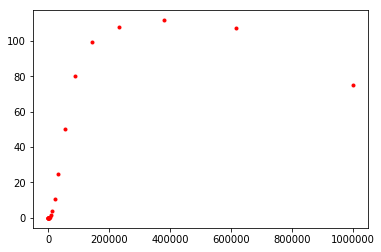

In [24]:
idx = [chi2 == 2163.5229333817797]
idx2 = np.where(idx)[1]
print(idx2)
plt.figure()
plt.plot(ap, phot_Jy_MSX_A, 'r.') # MSX_A W/m^2-sr to Jy *7.133e12*scale**2/((180/np.pi)**2*3600**2)
plt.plot(ap, fnu[int(idx2) ,:,wave_index], 'b.')
plt.xlabel('AU')
plt.ylabel('Jy')
plt.show()

In [99]:
import photutils
position = [image_data.shape[0]/2,image_data.shape[0]/2]
aperture = [SkyCircularAperture(position, r=r) for r in radpix]
annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
annulus_aperture.area()
hel(aperture[0])

TypeError: positions must be a SkyCoord object.

In [118]:
fnu[62855,:,wave_index]

array([8.3511723e-06, 3.1181524e-05, 1.1784705e-04, 3.4523857e-04,
       8.6038950e-04, 2.5837237e-03, 6.9889990e-03, 1.9933635e-02,
       6.2739186e-02, 2.3103383e-01, 1.7759768e+00, 1.2977672e+01,
       3.3455162e+01, 5.4947781e+01, 5.9258797e+01, 7.4100868e+01,
       7.7357864e+01, 7.7358055e+01, 7.7358055e+01, 7.7358055e+01],
      dtype=float32)

In [85]:
np.nanargmin(chi2)


256309

In [47]:
 bkg_sum_array

array([1.06612071e-10, 2.81098814e-10, 7.41159440e-10, 1.95417870e-09,
       5.15248704e-09, 1.35853096e-08, 3.58197187e-08, 9.44440935e-08,
       2.49016104e-07, 6.56568535e-07, 1.73114202e-06, 4.56441715e-06,
       1.20347746e-05, 3.17314992e-05, 8.36648860e-05, 2.20595097e-04,
       5.81632260e-04, 1.53356122e-03, 4.04346557e-03, 1.06612071e-02])

In [27]:
annulus_aperture.area()

8.304370987426017

In [92]:
scale**2/((180/np.pi)**2*3600**2)

8.461595403616441e-10

In [34]:
phot_table = aperture_photometry(image_data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   599.5   599.5  0.023897853


In [12]:
phot_table

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1,aperture_sum_2,aperture_sum_3,aperture_sum_4,aperture_sum_5,aperture_sum_6,aperture_sum_7,aperture_sum_8,aperture_sum_9,aperture_sum_10,aperture_sum_11,aperture_sum_12,aperture_sum_13,aperture_sum_14,aperture_sum_15,aperture_sum_16,aperture_sum_17,aperture_sum_18,aperture_sum_19
,pix,pix,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,599.5,599.5,4.4389599e-08,1.1703988e-07,3.085933e-07,8.1365279e-07,2.1453184e-06,5.6564556e-06,1.4914099e-05,3.9323272e-05,0.00010368174,0.00027337255,0.00072078799,0.0018532493,0.0042336112,0.0082257978,0.010941277,0.011805939,0.012506054,0.013838021,0.016802473,0.023897853


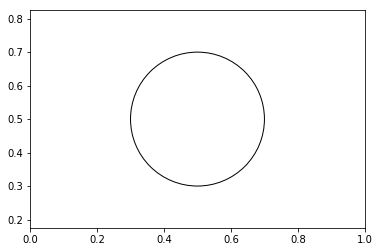

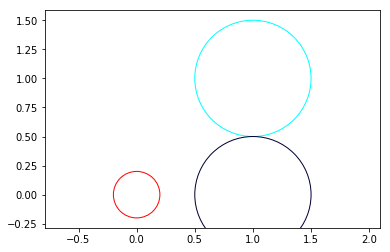

In [14]:
import matplotlib.pyplot as plt

circle2 = plt.Circle((0.5, 0.5), 0.2,  fill=False)
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()
ax.set_aspect('equal', adjustable='datalim')
ax.add_artist(circle2)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 0.2, color='r', fill=False))
ax.add_patch(plt.Circle((1, 1), 0.5, color='#00ffff', fill=False))
ax.add_artist(plt.Circle((1, 0), 0.5, color='#000033', fill=False))
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()


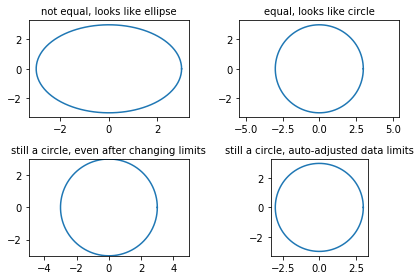

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Plot circle of radius 3.

an = np.linspace(0, 2 * np.pi, 100)
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 0].set_title('not equal, looks like ellipse', fontsize=10)

axs[0, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 1].axis('equal')
axs[0, 1].set_title('equal, looks like circle', fontsize=10)

axs[1, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 0].axis('equal')
axs[1, 0].set(xlim=(-3, 3), ylim=(-3, 3))
axs[1, 0].set_title('still a circle, even after changing limits', fontsize=10)

axs[1, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 1].set_aspect('equal', 'box')
axs[1, 1].set_title('still a circle, auto-adjusted data limits', fontsize=10)

fig.tight_layout()

plt.show()

In [13]:
import MSX_photometry

SyntaxError: invalid syntax (<ipython-input-13-8dcce35e7ca7>, line 1)

In [11]:
photometry_MSX_A

NameError: name 'photometry_MSX_A' is not defined